# Data Processing

## Task 1

import numpy, pandas and calendar libraries.

In [4]:
import numpy as np
import pandas as pd
import calendar

### Initialize 12 random integers from the range [65...75]

In [9]:
#set seed so that results can be replicated
np.random.seed(12)

#Initialize 12 random integers within the range [65..75]
rints = np.random.randint(65, high = 75, size = 12)

#visualize the generated random integers
print(rints)

[71 66 67 68 68 65 71 66 69 70 74 67]


### Create a pandas series

In [10]:
#create a pandas series and visualize the series
mean_temps = pd.Series(rints, dtype=int)
print(mean_temps)

0     71
1     66
2     67
3     68
4     68
5     65
6     71
7     66
8     69
9     70
10    74
11    67
dtype: int32


### Set the indices of the series as full names of months

In [4]:
#set the indices of the pandas series as the full names of the months and visualize the series object
months = ["January", "February","March","April","May","June","July","August","September","October","November","December"]
mean_temps = pd.Series(rints, index = months, dtype=int)
print(mean_temps)

January      71
February     66
March        67
April        68
May          68
June         65
July         71
August       66
September    69
October      70
November     74
December     67
dtype: int32


### Convert temperatures from Fahrenheit into Celsius

In [11]:
#Convert the temperatures from Fahrenheit into Celsius and visualise them Note: formula 5/9 x (F-32)
mean_temps_celcius = (mean_temps.iloc[:] - 32)*5/9

#convert the series to integers
mean_temps_celcius_ints = mean_temps_celcius.astype(int)

print(mean_temps_celcius_ints)

0     21
1     18
2     19
3     20
4     20
5     18
6     21
7     18
8     20
9     21
10    23
11    19
dtype: int32


### Find mode

In [6]:
#determine the mode
mean_temps_celcius_ints.mode()

0    18
1    20
2    21
dtype: int32

### Number of months average was recorded

This can be accomplished by using the *len* function.

In [12]:
#number of months this average temperature was recorded
num_months = len(mean_temps_celcius_ints.mode())
print(num_months)

3


## Task 2

### 1. Download dataset from (https://www.kaggle.com/camnugent/california-housing-prices)

Employ *pd.read_csv* function to load the dataset into memory. Calling the shape function on the data frame returns a tuple of the number of rows and the number of columns.

In [15]:
path = "C:\\Users\\joshua\\Desktop\\ASSIGNMENTS\\5582744_1500739164_ProgrammingFundamentals\\Programming Fundamentals\\Week6..Dataset\\housing.csv"
housing = pd.read_csv(path)
housing.shape

(20640, 10)

### 2. Check the data frame for Missing values and resolve

Chain *isnull* and *any* function on the data frame. This will show whether any columns contain any missing values ie null values.

In [16]:
#this operation reveals that there is some missing values in the column total_bedrooms
print(housing.isnull().any())

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool


In [164]:
# creating bool series True for NaN values
bool_total_bedrooms = pd.isnull(housing["total_bedrooms"]) 

#filter to see missing values of column total_bedrooms
housing[bool_total_bedrooms]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [18]:
#Given that the dataset has over 20,000 rows, we can afford to fix the data by dropping 207 the missing values 
housing1 = housing.dropna(axis = 0, how ='any')
housing1.shape

(20433, 10)

### 3. Check the data frame for Unnecessary duplicates and resolve

*Based on which column are we checking for duplicates?*

In [174]:
#The new dataset is held in variable housing1
housing1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [194]:
#select the first column of the data frame and call method duplicated and then call method any on it
housing1.iloc[:, 0].duplicated().shape

(20433,)

### 4. Check the data frame for Wrong data types and resolve

(20433,)


False

### 5. Check the data frame for Wrong values and resolve

### 6. Save the updated data frame into a new CSV file

### 7. Describe the Mean of column 'median_house_value'

Call function *mean* on the Series object.

In [197]:
housing1["median_house_value"].mean()

206864.41315519012

### 8. Describe the Median of column 'median_house_value' 

Call function *median* on the Series object.

In [199]:
housing1["median_house_value"].median()

179700.0

### <span color="red">9. Describe the Range of column 'median_house_value'</span>

In [22]:
housing1["median_house_value"].describe()

count     20433.000000
mean     206864.413155
std      115435.667099
min       14999.000000
25%      119500.000000
50%      179700.000000
75%      264700.000000
max      500001.000000
Name: median_house_value, dtype: float64

### 10. The column 'median_income' contains currency in tens of thousands USD.
Convert it into USD and visualise the entire updated data frame

In [23]:
housing1["median_house_value"] = housing1["median_house_value"] * 10000
housing.head()

<ipython-input-23-99b7521b875c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing1["median_house_value"] = housing1["median_house_value"] * 10000


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Statistics with Python

## Task 1

### Part 1

import numpy, pandas and the matplotlib libraries.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Initialise an array representing a uniformly distributed dataset containing 20 data points
of integer type with minimum value 0 and maximum value 100. Visualise the values of
the datapoints and plot the dataset.

In [25]:
#ensure our results are replicated
np.random.seed(12)

#Initialise an array representing a uniformly distributed
vals = np.random.randint(low=0, high=100, size=20, dtype=int)

print(vals)

[75 27  6  2  3 67 76 48 22 49 52  5 13 89 34 75 74  0 76 13]


A histogram of random numbers

(array([5., 2., 1., 2., 0., 3., 0., 1., 5., 1.]),
 array([ 0. ,  8.9, 17.8, 26.7, 35.6, 44.5, 53.4, 62.3, 71.2, 80.1, 89. ]),
 <BarContainer object of 10 artists>)

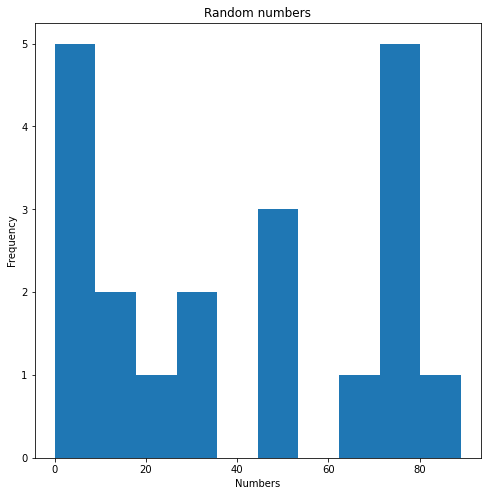

In [30]:
#plot the dataset
plt.figure(figsize=(8, 8))
plt.title("Random numbers")
plt.xlabel("Numbers")
plt.ylabel("Frequency")
plt.hist(vals)

### Part 2

Provide the following information for the generated dataset:

####  Mean


Call function *mean* on the Series object.

In [33]:
#Mean

#create a pandas series object
pd_series = pd.Series(vals)

#calculate mean
pd_series.mean()

40.3

#### Mode


Call function *mode* on the Series object.

In [115]:
#Mode

#calculate mode
pd_series.mode()

0    13
1    75
2    76
dtype: int32

#### Lower quartile


Call function *quantile* on the Series object and pass in 0.25 as the fraction the coincides with the lower quartile.

In [116]:
#Lower quartile

#calculate the lower quartile
pd_series.quantile(0.25)

11.25

#### Median


Call function *median* on the Series object.

In [117]:
#Median
pd_series.median()

41.0

#### Upper quartile


Call function *quantile* on the Series object and pass in 0.75 as the fraction that coincides with the upper quartile.

In [118]:
#Upper quartile

pd_series.quantile(0.75)

74.25

#### Interquartile range

The difference between the upper and lower quartile will constitute the interquartile range.

In [34]:
#Interquartile range

#calculate the interquartile range ie upper minus lower quartile
pd_series.quantile(0.75) - pd_series.quantile(0.25)

63.0

#### Two different solutions for calculating the standard deviation

##### 1.Using a library function

In [120]:
pd_series.std()

31.116250619757825

##### 2.Applying a formula without using a library function

In [ ]:
#find the mean
series_mean = pd_series.mean()
print(series_mean)

In [ ]:
#calculate the deviations from the mean
deviations = pd_series - series_mean
print(deviations)

In [ ]:
#square the deviations
square_of_deviations = deviations ** 2
print(square_of_deviations)

In [ ]:
#Find the summation of the deviations
sum_of_deviations = square_of_deviations.sum()
print(sum_of_deviations)

In [ ]:
#Divide the sum of deviations by the number of observations
average_of_deviations = sum_of_deviations / len(pd_series)

In [ ]:
#Find the square root of the result
average_of_deviations

In [ ]:
standard_deviation = np.sqrt(average_of_deviations)
print(standard_deviation)

## Task 2

### Part 1 

Initialise a two-dimensional array consisting of 5 rows and 10 columns...

In [38]:
#set seed
np.random.seed(1234)

#generate the data points, since it is a 5 by 10, the size will be 50
data_points = np.random.randint(low=0, high=9, size=50, dtype=int)

#make the data points into a 5 by 10 matrix
data_points_matrix = np.reshape(data_points, (5, 10))
print(data_points_matrix)

[[3 6 5 4 8 1 7 6 8 0]
 [5 0 6 2 0 5 2 6 3 7]
 [0 0 3 2 3 1 3 1 3 7]
 [1 7 4 0 5 1 5 4 0 8]
 [8 6 8 6 3 1 2 5 2 5]]


Displaying a matrix as a table.

In [39]:
#display as data points as a table
df = pd.DataFrame(data_points_matrix)
print(df)

   0  1  2  3  4  5  6  7  8  9
0  3  6  5  4  8  1  7  6  8  0
1  5  0  6  2  0  5  2  6  3  7
2  0  0  3  2  3  1  3  1  3  7
3  1  7  4  0  5  1  5  4  0  8
4  8  6  8  6  3  1  2  5  2  5


Plot the first two rows on a single diagram with different colors

In [40]:
#selecting the first two rows
first_two_rows = df.iloc[:, 0:2]
print(first_two_rows)

   0  1
0  3  6
1  5  0
2  0  0
3  1  7
4  8  6


Plot the first the rows above

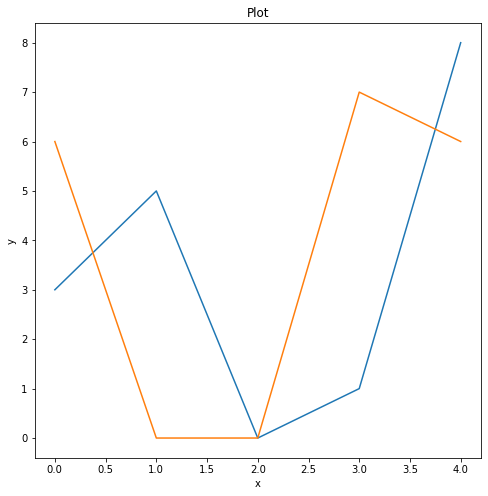

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(first_two_rows)

### Part 2 

#### Mean, Median, Standard deviation for the rows

To be able to provide the above information for rows of the above data frame, you first have to find the transpose of the data frame. 

In [122]:
#find the transpose of the data frame to ensure that you are working with rows
df.transpose().describe(percentiles=[0.5])

,0,1,2,3,4
count,10.000000,10.00000,10.000000,10.000000,10.000000
mean,4.800000,3.60000,2.300000,3.500000,4.600000
std,2.780887,2.54733,2.057507,2.877113,2.503331
min,0.000000,0.00000,0.000000,0.000000,1.000000
50%,5.500000,4.00000,2.500000,4.000000,5.000000
max,8.000000,7.00000,7.000000,8.000000,8.000000


### Part 3 (2 points):

Initialise a one-dimensional array representing a normal distribution of 1000 data points
with mean value 17 and standard deviation 0.2.

In [44]:
data = np.random.normal(17, 0.2, size=1000)
print(data)

[16.84976106 17.0357555  16.83265219 17.10187925 16.99177522 16.97761808
 16.84819852 16.9908128  16.81845443 16.94417726 17.04882405 17.07321128
 16.94579975 16.98575857 17.01696737 17.02408286 16.74627063 17.10496747
 17.19676754 16.7470184  17.06651319 17.15008752 16.78415756 16.87437692
 17.05986941 17.02545545 17.18523799 17.49104798 16.93582197 16.93767467
 17.02619238 17.0525571  17.2047529  16.98748099 16.76353994 16.93104985
 16.95090187 16.79480095 17.01088496 16.91863028 16.85747389 17.17246912
 16.88448994 16.89763639 17.08511034 16.98724835 17.03937896 16.97737236
 16.94519519 17.05404379 16.79982214 17.28702067 17.03190393 17.12311667
 17.00566797 17.38350738 16.85752839 17.08226517 17.10657388 17.1443531
 16.83736441 16.98339772 17.12217256 16.96423219 16.70687904 16.91036682
 17.3554183  17.35726139 17.3654275  16.75874764 17.11245849 16.74235736
 17.090738   16.99572875 16.92141364 16.9422558  16.94572605 16.75014807
 17.15970103 17.38234353 17.38028709 17.17025804 17.

Call function *std* on the numpy array to get standard deviation.

In [103]:
data.std()

0.20033168500868037

### Part 4 

#### Maximum

Call function *max* on the numpy object to get the maximum value.

In [47]:
data.max()

17.752466639839604

#### Minimum

Can function *min* on the numpy array object to get the minimum value.

In [48]:
data.min()

16.37160524113363

#### Range

Find the difference between the output of calling function *max* and function *min*

In [49]:
data.max() - data.min()

1.3808613987059744

### Part 5 (2 points):

Visualise the dataset by using a histogram with 10 bins. 

(array([  5.,  31., 105., 186., 299., 204., 113.,  42.,  13.,   2.]),
 array([16.37160524, 16.50969138, 16.64777752, 16.78586366, 16.9239498 ,
        17.06203594, 17.20012208, 17.33820822, 17.47629436, 17.6143805 ,
        17.75246664]),
 <BarContainer object of 10 artists>)

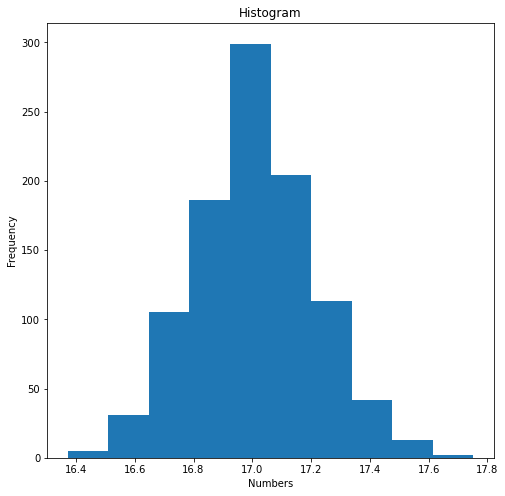

In [50]:
plt.figure(figsize=(8, 8))
plt.title("Histogram")
plt.xlabel("Numbers")
plt.ylabel("Frequency")
plt.hist(data, bins=10)

Visualise the probability density function.

# Linear Algebra in Practice

## Task 1

### Initialize matrix A

In [52]:
import numpy as np
A = np.array([
    [2, 5, 1],
    [4, 3, 7],
    [1, 3, 2]
])

### Determinant

In [53]:
np.linalg.det(A)

-26.000000000000014

### Trace

In [54]:
A.trace()

7

### Inverse of matrix

In [15]:
#Inverse
np.linalg.inv(A)

array([[ 0.57692308,  0.26923077, -1.23076923],
       [ 0.03846154, -0.11538462,  0.38461538],
       [-0.34615385,  0.03846154,  0.53846154]])

## Task 2

Find the product P of the matrices B and C by using the Python function for matrix
multiplication. Display the result on the screen

In [16]:
B = np.array([
    [4, 7, 2],
    [3, 2, 5],
    [6, 4, 3]
])

C = np.array([
    [3, 1, 9],
    [7, 5, 8],
    [2, 1, 1]
])

### Multiplication of matrix B and C

In [17]:
A * B

array([[ 8, 35,  2],
       [12,  6, 35],
       [ 6, 12,  6]])

## Task 3:

### Represent the system of linear equations by using matrices.

3x + 2y - z = 25


2x - y + 4z = 19

4x - 2y + 3z = 18

| A | vars  |  | b |
| :---: | :---: | :---: | :---: |
| $$\begin{bmatrix} 3 & 2 & -1 \\ 2 & -1 & 4 \\ 4 & -2 & 3 \end{bmatrix}$$ | $$\begin{bmatrix} x \\ y \\ z \end{bmatrix}$$ | = | $$\begin{bmatrix} 25 \\ 19 \\ 18 \end{bmatrix}$$ | 

## Task 4:

### Algebraic steps for solving the system of linear equations from Task 3 by using matrix notation.

$$A=\begin{bmatrix} 3 & 2 & -1 \\ 2 & -1 & 4 \\ 4 & -2 & 3 \end{bmatrix}$$

$$b=\begin{bmatrix} x \\ y \\ z \end{bmatrix}$$

$$Z = \begin{bmatrix} 25 \\ 19 \\ 18 \end{bmatrix}$$

<center>Ab = Z</center>

<center>$A^-$$^1$b = Z$A^-$$^1$</center>

<center>b = ZA$^-$$^1$</center>

## Task 5:

Solve the system of linear equations from Task 3 by using Python script utilising matrix
multiplication and inverse matrix.

In [55]:
#initialize matrix A
A = np.array([
    [3, 2, -1],
    [2, -1, 4],
    [4, -2, 3]
])

#Find the inverse of matrix A
invA = np.linalg.inv(A)

#print to view
print(invA)

[[ 0.14285714 -0.11428571  0.2       ]
 [ 0.28571429  0.37142857 -0.4       ]
 [ 0.          0.4        -0.2       ]]


In [56]:
#Initialize matrix b
b = np.array([
    [25], 
    [19], 
    [18]
])

#print to view
print(b)

[[25]
 [19]
 [18]]


In [57]:
x, y, z = np.dot(invA, b)
print(x, y, z)

[5.] [7.] [4.]


# Data Visualisation with Python

Data Visualisation with Python

## Task 1 

Develop a graph which represents the public transport network of a city of your choice.
Some cities have extensive public transport networks.

## Task 2 

### Average monthly temperatures of three cities of your choice

In [58]:
#Path to the csv file
path = "C:\\Users\\joshua\\Desktop\\ASSIGNMENTS\\5582744_1500739164_ProgrammingFundamentals\\Programming Fundamentals\\Week6..Dataset\\HeatMap.csv"

#import pandas
import pandas as pd

#read the heatMap.csv dataset using pandas and transpose
heat = pd.read_csv(path, index_col=0).transpose()

#View the first five variables
heat.head()

City,Phoenix,Little Rock,Sacramento,Denver,Hartford,Dover,Tallahassee
1,6,4,9,-2,-2,1,15
2,8,6,11,1,1,2,17
3,11,12,13,5,4,6,19
4,16,17,15,9,10,12,22
5,21,21,18,14,15,17,25


In [59]:
#average Little Rock
print("Little Rock mean: ", heat["Little Rock"].mean())

Little Rock mean:  16.416666666666668


In [60]:
#average Sacramento
print("Sacramento mean: ", heat["Sacramento"].mean())

Sacramento mean:  16.083333333333332


In [61]:
#average of Phoenix
print("Phoenix mean: ", heat["Phoenix"].mean())

Phoenix mean:  16.333333333333332


### Heat Map

The vmin and vmax arguments of function *plt.imshow* allows users to specify a threshold.

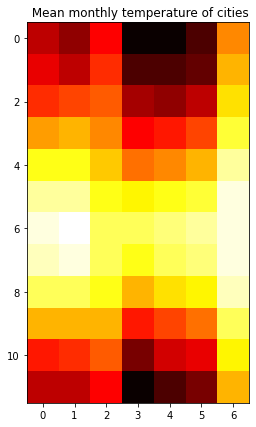

In [8]:
import matplotlib.pyplot as plt

#determine the size of the plot
plt.figure(figsize=(7, 7))

#Set the tile of the heatmap
plt.title(" Mean monthly temperature of cities")

#plot the actual heatmap
plt.imshow(heat, cmap="hot", interpolation="nearest", vmin = None, vmax = None)
plt.show()

<AxesSubplot:title={'center':' Mean monthly temperature of cities'}, xlabel='City'>

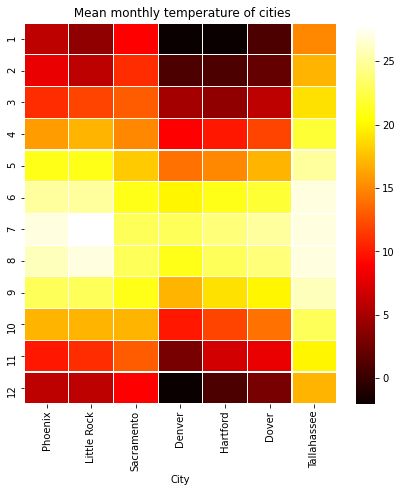

In [9]:
#Heatmap with scale
import seaborn as sns

#Set the size of the plot
plt.figure(figsize=(7, 7))

#Set the title of the plot
plt.title(" Mean monthly temperature of cities")
sns.heatmap(heat, linewidth=0.1, cmap="hot", vmin = None, vmax = None)

## Task 3

Represent the data from Task 2 by using parallel coordinates. Use different colours for
each city's average monthly temperatures

In [65]:
from pandas.plotting import parallel_coordinates
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
pd.read_csv(path).head()

,City,1,2,3,4,5,6,7,8,9,10,11,12
0,Phoenix,6,8,11,16,21,25,27,26,23,17,10,6
1,Little Rock,4,6,12,17,21,25,28,27,23,17,11,6
2,Sacramento,9,11,13,15,18,21,23,23,21,17,13,9
3,Denver,-2,1,5,9,14,20,23,21,17,10,3,-2
4,Hartford,-2,1,4,10,15,21,24,23,19,12,7,1


In [63]:
path = "C:\\Users\\joshua\\Desktop\\ASSIGNMENTS\\5582744_1500739164_ProgrammingFundamentals\\Programming Fundamentals\\Week6..Dataset\\HeatMap.csv"
pd.read_csv(path).columns

Index(['City', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], dtype='object')

<AxesSubplot:title={'center':'Temperature of cities vs month'}, xlabel='Months', ylabel='Temperature'>

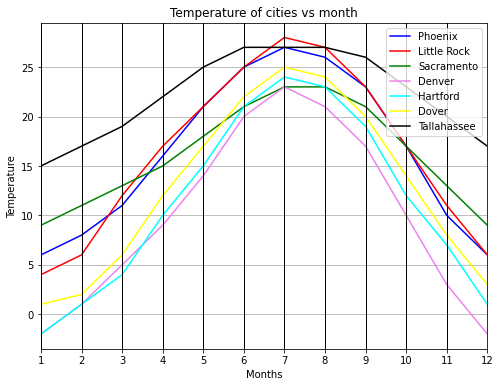

In [66]:
plt.figure(figsize=(8, 6))
plt.title("Temperature of cities vs month")
plt.xlabel("Months")
plt.ylabel("Temperature")

#the colors argument of function parallel coordinates allows you to specify different colors for the plot
parallel_coordinates(pd.read_csv(path), "City", color=["blue", "red", "green", "violet", "cyan", "yellow", "black"])